In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib

In [50]:
# Set the start and end date
start_date = '2010-01-01'
end_date = '2024-04-16'

# Set the ticker
ticker = 'TSLA'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Calculate Adj Close
data['Adj Close'] = data['Close']

# Calculate RSI
data['RSI'] = talib.RSI(data['Adj Close'])

# Calculate SMA (Simple Moving Average)
data['SMA'] = talib.SMA(data['Adj Close'])

# Calculate K
high = data['High']
low = data['Low']
close = data['Close']
data['K'] = 100 * (close - low) / (high - low)

# Calculate today's trend (Assuming if today's close > today's open, it's an uptrend)
data['today_trend'] = np.where(data['Close'] > data['Open'], 1, 0)

# Shift the close prices by one day to get tomorrow's close prices
data['tomorrow_close'] = data['Close'].shift(-1)

# Calculate tomorrow's trend
data['tomorrow_trend'] = np.where(data['tomorrow_close'] > data['Close'], 1, 0)

# Drop the 'tomorrow_close' column
data.drop(columns=['tomorrow_close'], inplace=True)

# Print 5 rows
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-09  172.910004  179.220001  171.919998  176.880005  176.880005   
2024-04-10  173.039993  174.929993  170.009995  171.759995  171.759995   
2024-04-11  172.550003  175.880005  168.509995  174.600006  174.600006   
2024-04-12  172.339996  173.809998  170.360001  171.050003  171.050003   
2024-04-15  170.240005  170.690002  161.380005  161.479996  161.479996   

               Volume        RSI         SMA          K  today_trend  \
Date                                                                   
2024-04-09  103232700  50.125470  177.433667  67.945269            1   
2024-04-10   84532400  45.856140  176.501334  35.569119            0   
2024-04-11   94516000  48.477532  175.586667  82.632334            1   
2024-04-12   64506600  45.511363  174.559001  20.000088            0   
2024-04-15   99744400  38.646476  173.187001   1.

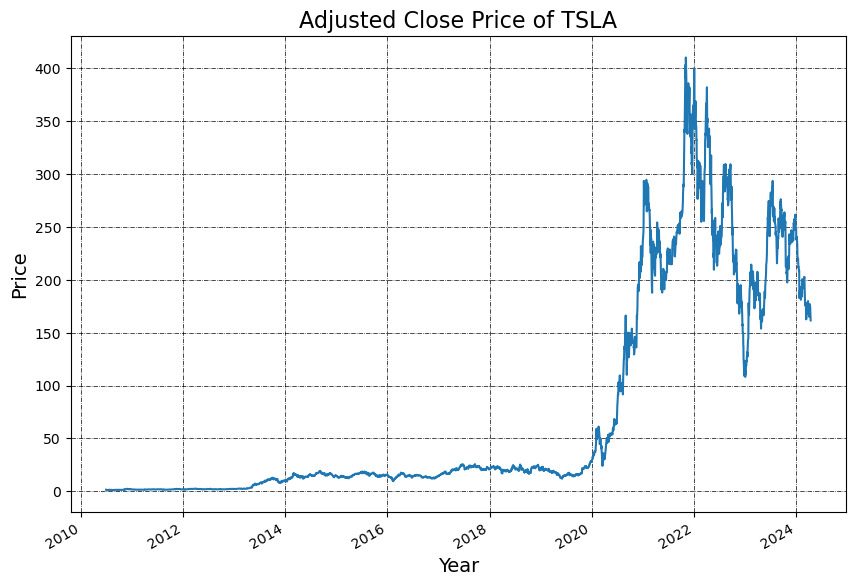

In [51]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [52]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Save data to CSV file
# data.to_csv('')

Missing values:
 Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
RSI               14
SMA               29
K                  0
today_trend        0
tomorrow_trend     0
dtype: int64
